In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


In [98]:
df = pd.read_csv('updated_nse_all_share_index.csv')

In [99]:
df

,Date,Price,Open,High,Low,Volume
0,2022-12-30,51251.06,50294.60,51346.08,50247.57,890.15
1,2022-12-29,50300.00,49934.60,50313.18,49934.60,297.94
2,2022-12-28,49934.60,49706.09,49934.60,49695.81,498.73
3,2022-12-23,49706.09,49499.43,49737.10,49493.53,140.32
4,2022-12-22,49499.43,49475.43,49525.32,49398.37,132.51
...,...,...,...,...,...,...
2471,2013-08-01,29089.52,28986.20,29188.76,28956.39,254.81
2472,2013-07-01,28986.20,28501.70,28988.28,28501.70,254.81
2473,2013-04-01,28463.30,28455.72,28508.85,28441.39,254.81
2474,2013-03-01,28441.39,28505.75,28681.28,28386.39,254.81


In [100]:
# rename price to close
df.rename(columns={'Price': 'Close'}, inplace=True)

In [101]:
# gain info on data
df.describe()

,Close,Open,High,Low,Volume
count,2476.000000,2476.000000,2476.000000,2476.000000,2476.000000
mean,34624.328360,34595.821119,34775.449156,34438.659915,289.149523
std,7298.550816,7321.770427,7301.755304,7281.690557,168.147442
min,20669.380000,0.000000,20925.190000,20651.590000,51.880000
25%,28185.950000,28143.755000,28297.540000,28015.880000,239.242500
50%,34132.490000,34117.790000,34380.150000,33830.050000,254.810000
75%,39383.052500,39339.875000,39496.592500,39213.717500,274.422500
max,54085.300000,54085.300000,54290.840000,53735.830000,2140.000000


In [102]:
df['Date'] = pd.to_datetime(df['Date']).sort_values()
df = df.sort_values(by='Date')
df

,Date,Close,Open,High,Low,Volume
2454,2013-01-02,32413.03,31858.83,32414.21,31853.19,254.81
2434,2013-01-03,33183.20,33075.92,33184.22,32701.85,254.81
2352,2013-01-07,35832.16,36164.79,36172.16,35819.69,254.81
2329,2013-01-08,38292.07,37910.27,38292.36,37910.27,254.81
2269,2013-01-11,37765.82,37622.74,37792.79,37572.73,254.81
...,...,...,...,...,...,...
4,2022-12-22,49499.43,49475.43,49525.32,49398.37,132.51
3,2022-12-23,49706.09,49499.43,49737.10,49493.53,140.32
2,2022-12-28,49934.60,49706.09,49934.60,49695.81,498.73
1,2022-12-29,50300.00,49934.60,50313.18,49934.60,297.94


## Exploration

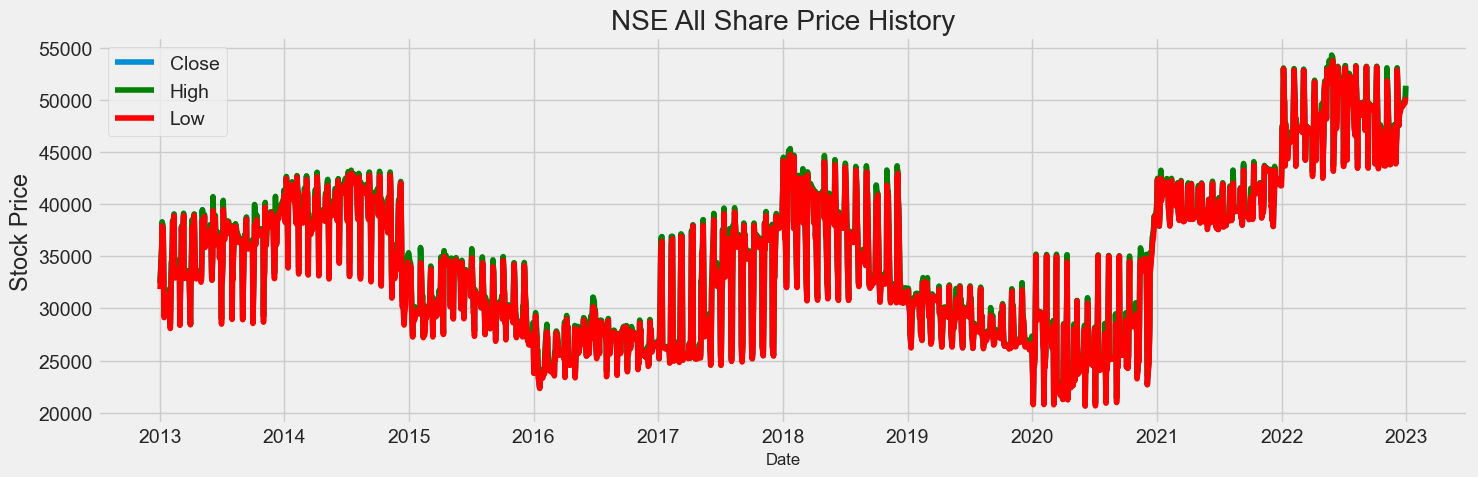

In [103]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(df["Date"], df["Close"], label="Close")
ax.plot(df["Date"], df["High"], color="green", label="High")
ax.plot(df["Date"], df["Low"], color="red", label="Low")

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Stock Price")
ax.set_title("NSE All Share Price History")

ax.legend()
plt.xticks()

plt.tight_layout()
plt.show()


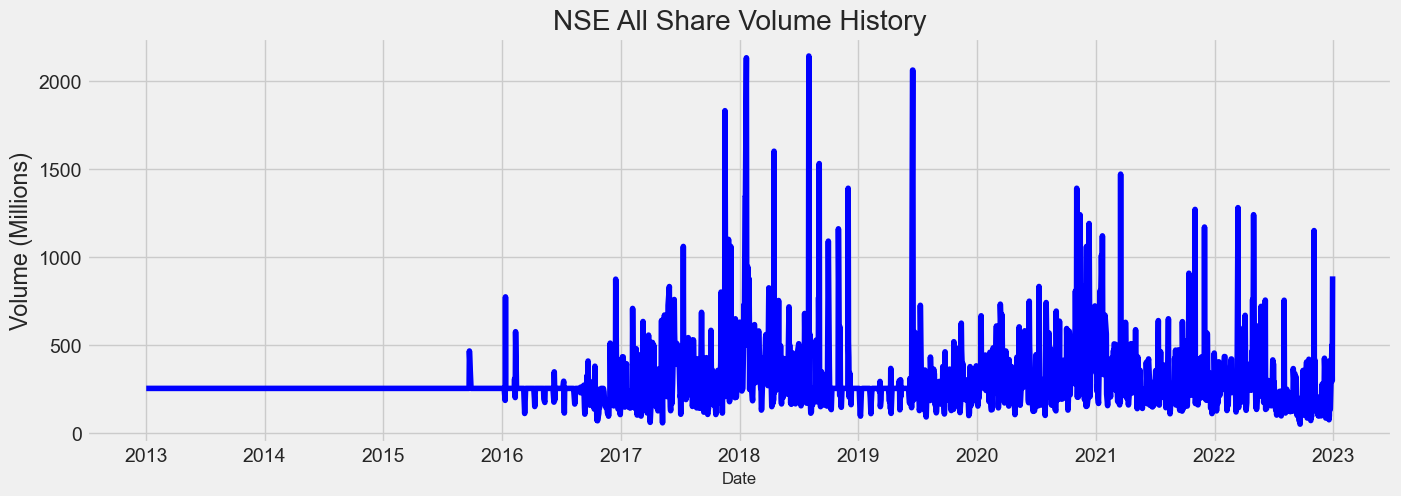

In [105]:
plt.figure(figsize=(15, 5))
plt.plot(df["Date"], df["Volume"], color="blue")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume (Millions)")
plt.title("NSE All Share Volume History")
plt.show()

Data does not have zero mean.
Data does not have constant variance.


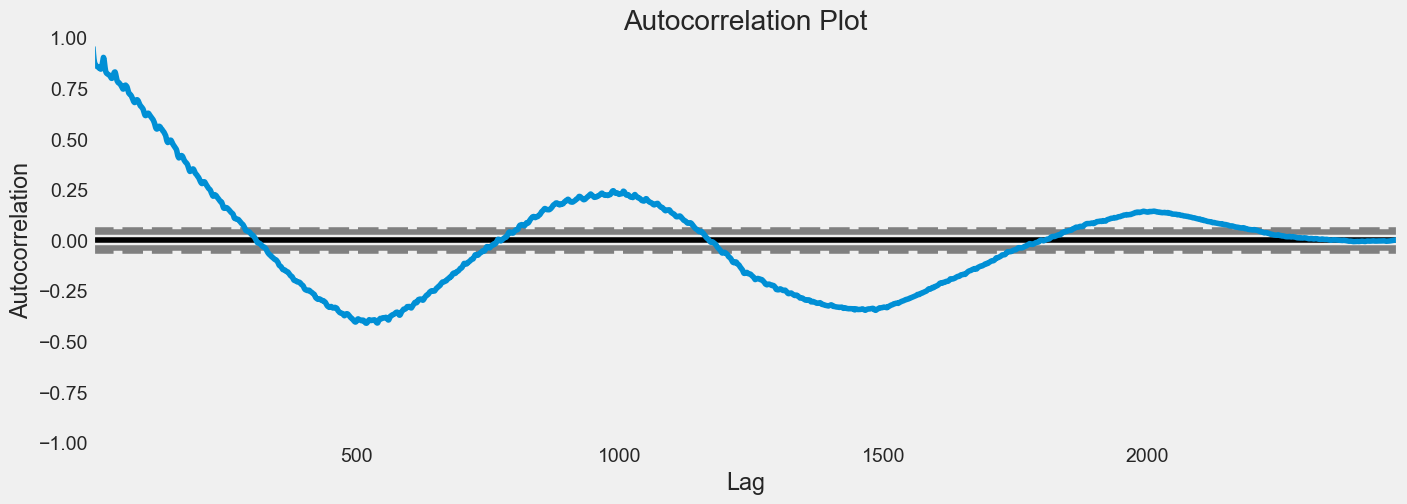

In [106]:
# check for white noise on time series (abandon if so)
mean = df["Close"].mean()
if np.isclose(mean, 0, atol=1e-5):
    print("Data has zero mean.")
else:
    print("Data does not have zero mean.")

# Check if the data has constant variance
variance = df["Close"].var()
if np.isclose(variance, 0, atol=1e-5):
    print("Data has constant variance.")
else:
    print("Data does not have constant variance.")

# Plot autocorrelation to check for zero correlation
plt.figure(figsize=(15, 5))
pd.plotting.autocorrelation_plot(df["Close"])
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Plot")
plt.show()

## NOISY DATA
Using Moving Averages to Smooth Time Series Data

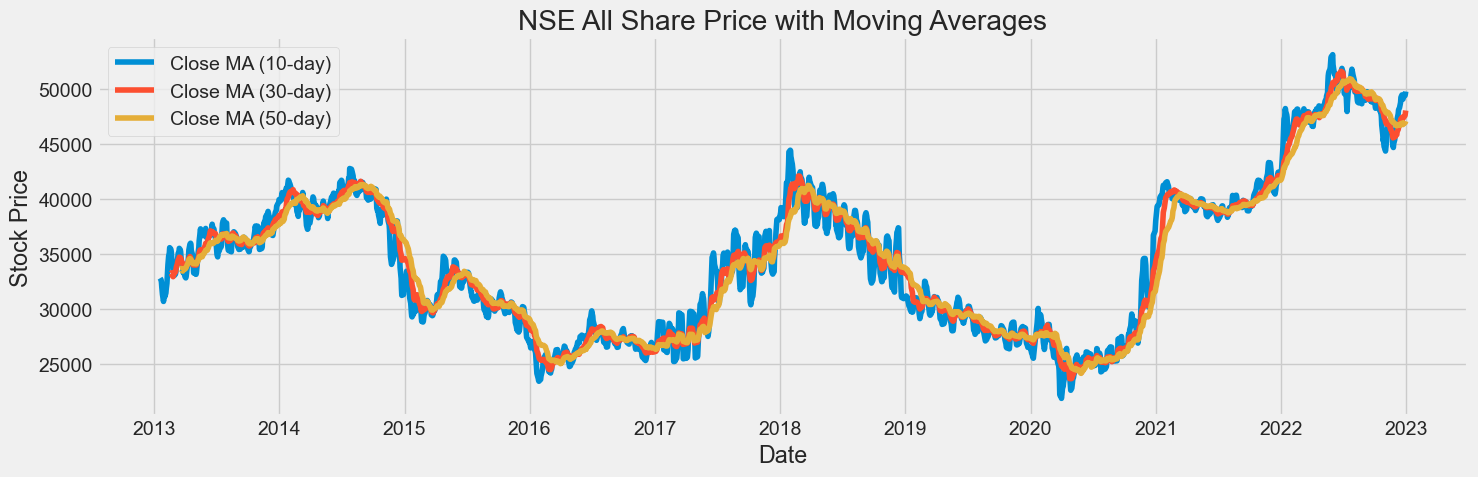

In [107]:
window_sizes = [10, 30, 50]
plt.figure(figsize=(15, 5))
for window in window_sizes:
    df[f'Close_MA_{window}'] = df['Close'].rolling(window=window).mean()
    plt.plot(df['Date'], df[f'Close_MA_{window}'], label=f'Close MA ({window}-day)')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('NSE All Share Price with Moving Averages')
plt.legend()
plt.xticks()
plt.tight_layout()

plt.show()


given our data is noisy lets apply predictions to the moving averages

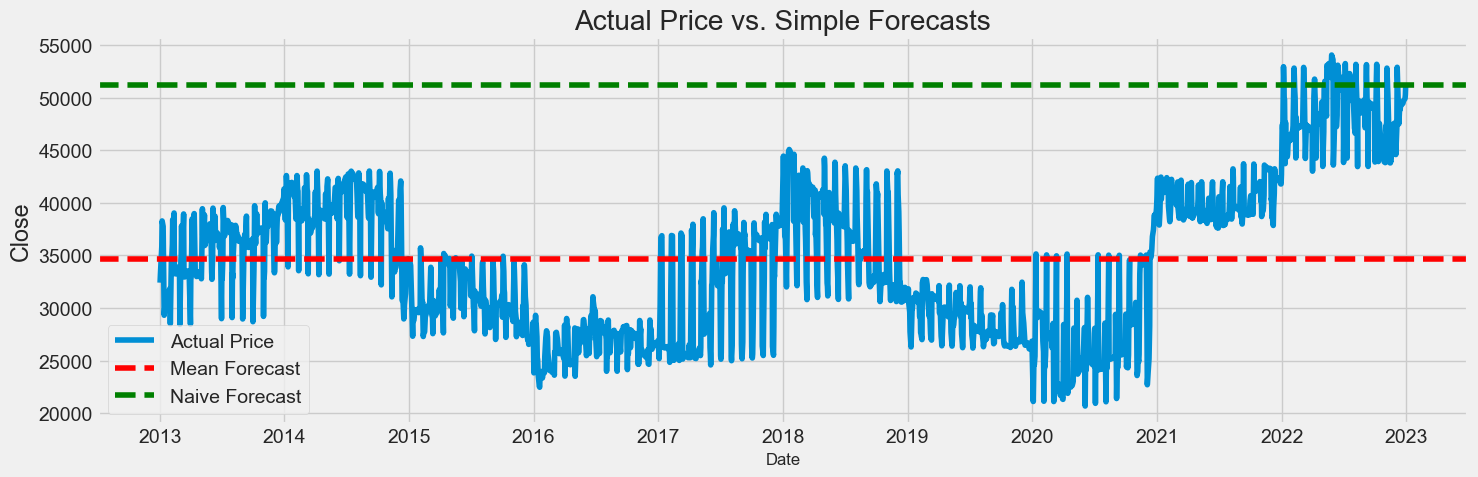

Mean Forecast: 34624.328360258485
Naive Forecast: 51251.06


In [108]:
# given that it is noisy  apply mean and naive forecasting instead
mean_forecast = df["Close"].mean()

naive_forecast = df["Close"].iloc[-1]

plt.figure(figsize=(15, 5))
plt.plot(df["Date"], df["Close"], label="Actual Price")
plt.axhline(mean_forecast, color='red', linestyle='dashed', label="Mean Forecast")
plt.axhline(naive_forecast, color='green', linestyle='dashed', label="Naive Forecast")

plt.xlabel("Date", fontsize=12)
plt.ylabel("Close")
plt.title("Actual Price vs. Simple Forecasts")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean Forecast: {mean_forecast}")
print(f"Naive Forecast: {naive_forecast}")
